In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [42]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [43]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<Axes: >

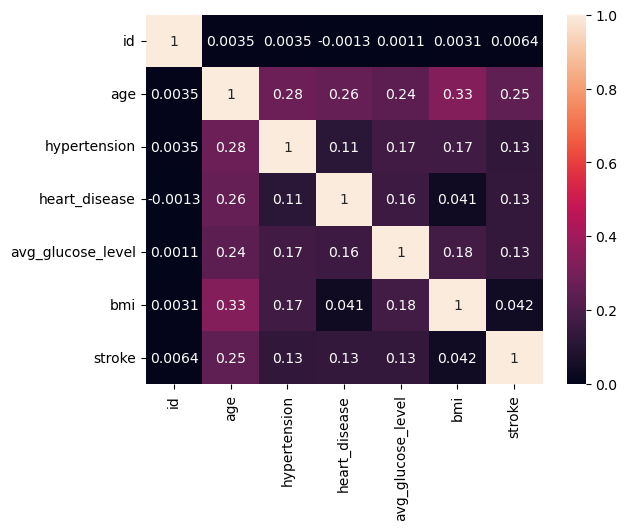

In [44]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

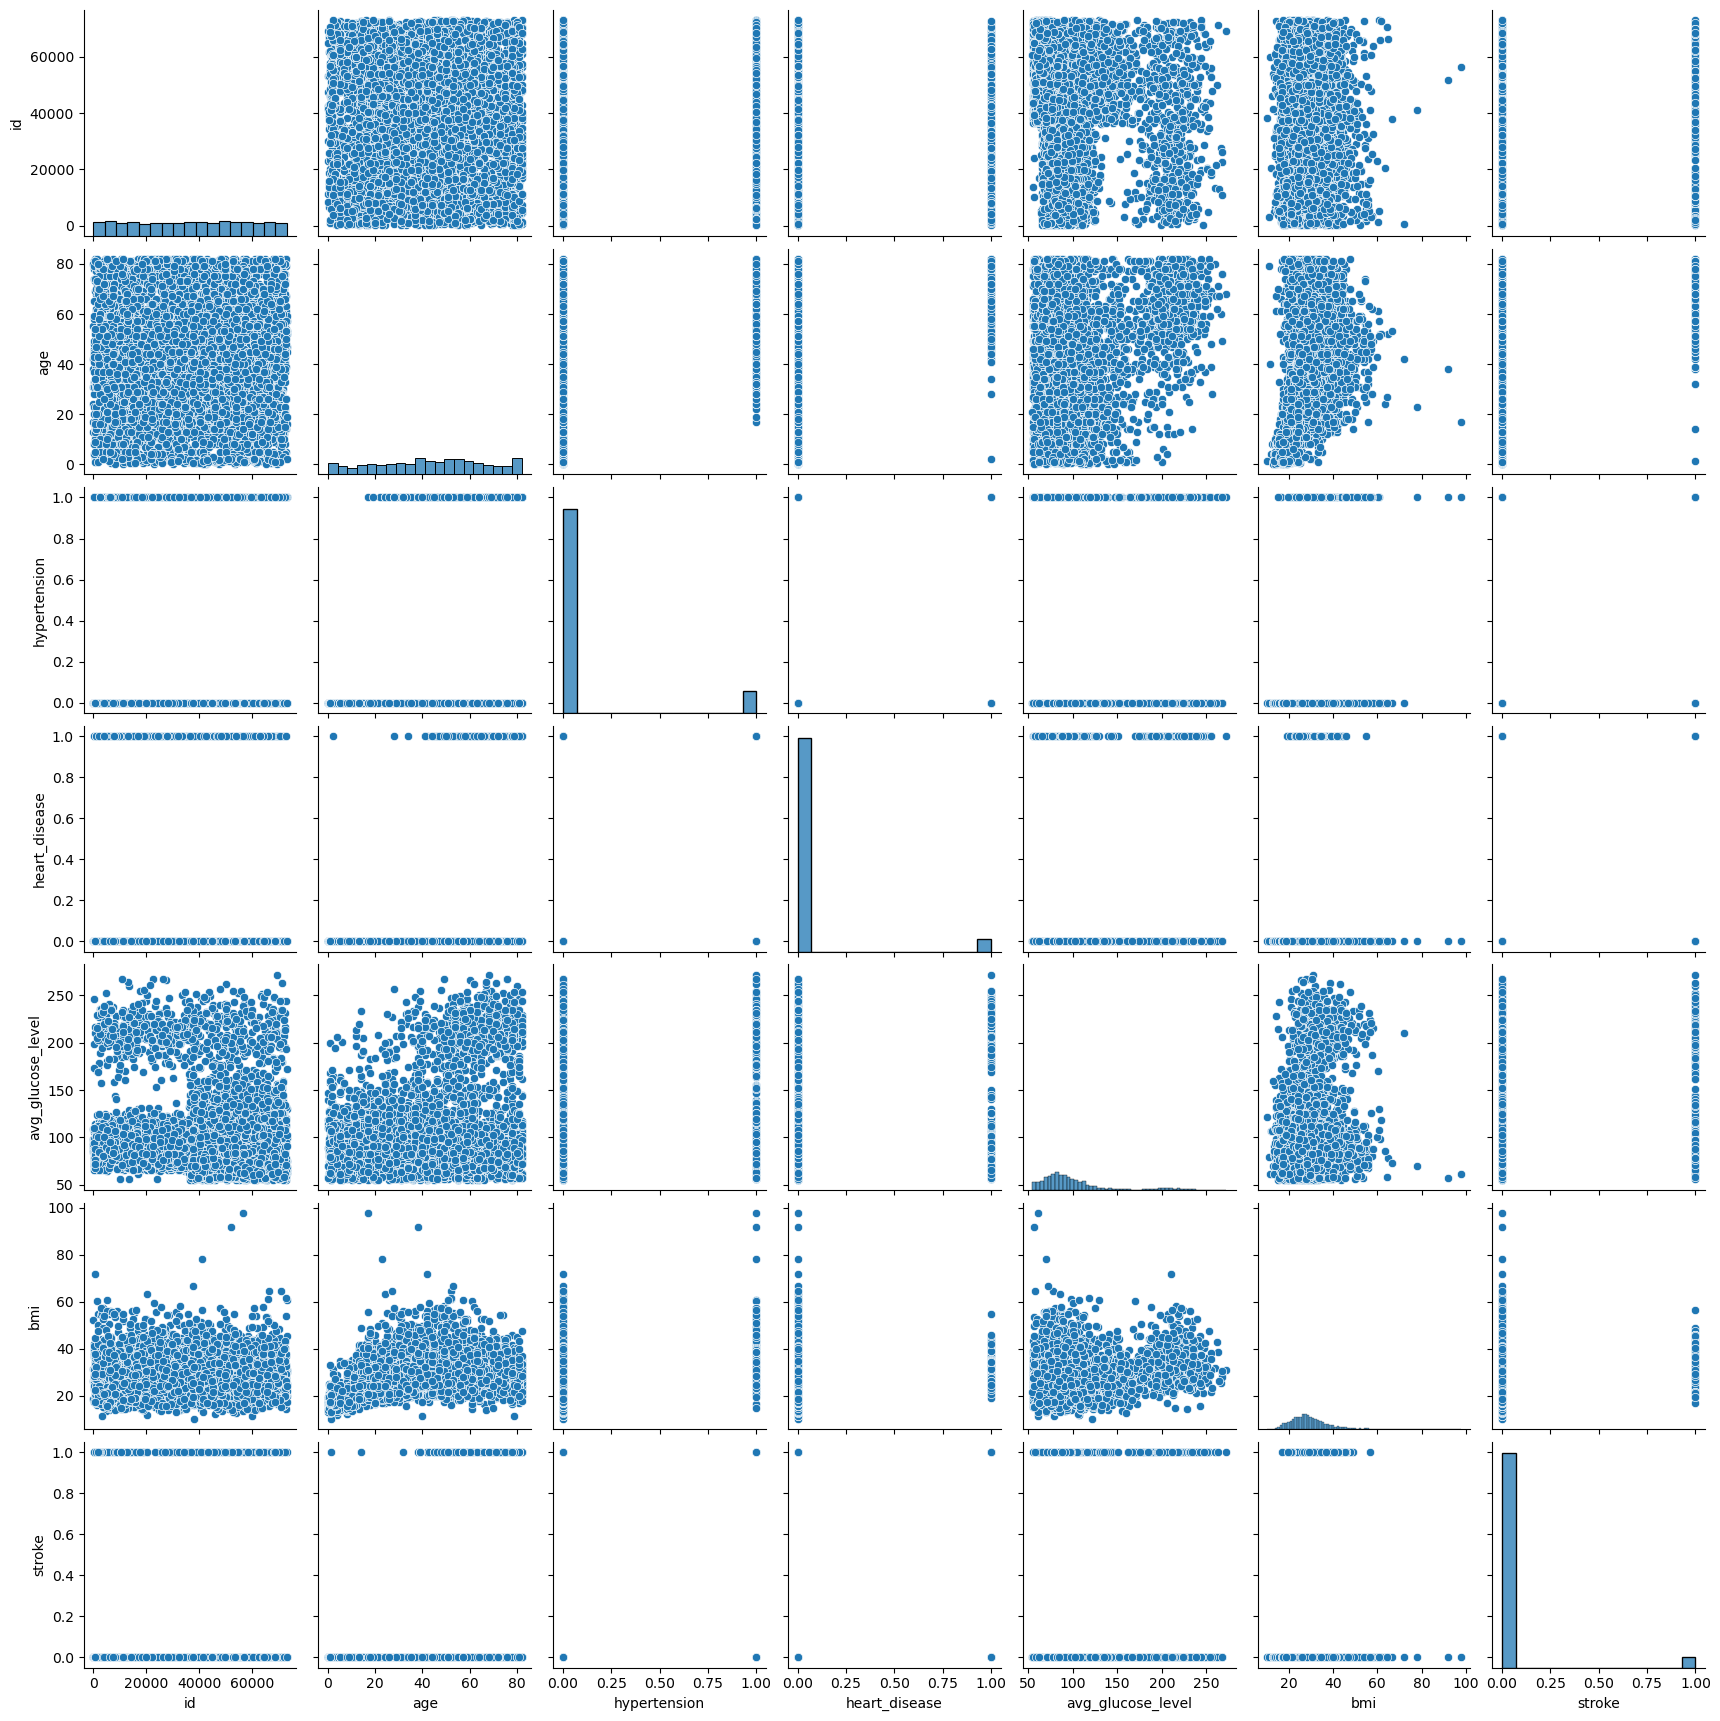

In [45]:
sns.pairplot(df)

In [46]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [47]:
df = pd.concat([df, pd.get_dummies(df["gender"])], axis=1)
df.drop(columns=["gender"], axis=1, inplace=True)

In [48]:
df["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [49]:
df["ever_married"] = df["ever_married"].map({"No": 0, "Yes": 1})

In [50]:
df

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other
0,9046,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1,False,True,False
1,51676,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1,True,False,False
2,31112,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1,False,True,False
3,60182,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1,True,False,False
4,1665,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,1,Private,Urban,83.75,NaN,never smoked,0,True,False,False
5106,44873,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0,True,False,False
5107,19723,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0,True,False,False
5108,37544,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0,False,True,False


In [51]:

df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [52]:
df = pd.concat([df, pd.get_dummies(df["work_type"])], axis=1)
df.drop(columns=["work_type"], axis=1, inplace=True)

In [53]:
df

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children
0,9046,67.0,0,1,1,Urban,228.69,36.6,formerly smoked,1,False,True,False,False,False,True,False,False
1,51676,61.0,0,0,1,Rural,202.21,NaN,never smoked,1,True,False,False,False,False,False,True,False
2,31112,80.0,0,1,1,Rural,105.92,32.5,never smoked,1,False,True,False,False,False,True,False,False
3,60182,49.0,0,0,1,Urban,171.23,34.4,smokes,1,True,False,False,False,False,True,False,False
4,1665,79.0,1,0,1,Rural,174.12,24.0,never smoked,1,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,1,Urban,83.75,NaN,never smoked,0,True,False,False,False,False,True,False,False
5106,44873,81.0,0,0,1,Urban,125.20,40.0,never smoked,0,True,False,False,False,False,False,True,False
5107,19723,35.0,0,0,1,Rural,82.99,30.6,never smoked,0,True,False,False,False,False,False,True,False
5108,37544,51.0,0,0,1,Rural,166.29,25.6,formerly smoked,0,False,True,False,False,False,True,False,False


In [54]:
df.drop(columns=["id"], axis=1, inplace=True)

In [55]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [56]:
df["Residence_type"] = df["Residence_type"].map({"Urban": 0, "Rural": 1})

In [57]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [58]:
df = pd.get_dummies(
    df,
    columns=["smoking_status"],
    prefix="smoke",
    dummy_na=False
)


In [59]:
df.isnull().sum()

age                        0
hypertension               0
heart_disease              0
ever_married               0
Residence_type             0
avg_glucose_level          0
bmi                      201
stroke                     0
Female                     0
Male                       0
Other                      0
Govt_job                   0
Never_worked               0
Private                    0
Self-employed              0
children                   0
smoke_Unknown              0
smoke_formerly smoked      0
smoke_never smoked         0
smoke_smokes               0
dtype: int64

In [60]:
df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,67.0,0,1,1,0,228.69,36.6,1,False,True,False,False,False,True,False,False,False,True,False,False
1,61.0,0,0,1,1,202.21,NaN,1,True,False,False,False,False,False,True,False,False,False,True,False
2,80.0,0,1,1,1,105.92,32.5,1,False,True,False,False,False,True,False,False,False,False,True,False
3,49.0,0,0,1,0,171.23,34.4,1,True,False,False,False,False,True,False,False,False,False,False,True
4,79.0,1,0,1,1,174.12,24.0,1,True,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,0,83.75,NaN,0,True,False,False,False,False,True,False,False,False,False,True,False
5106,81.0,0,0,1,0,125.20,40.0,0,True,False,False,False,False,False,True,False,False,False,True,False
5107,35.0,0,0,1,1,82.99,30.6,0,True,False,False,False,False,False,True,False,False,False,True,False
5108,51.0,0,0,1,1,166.29,25.6,0,False,True,False,False,False,True,False,False,False,True,False,False


<Axes: >

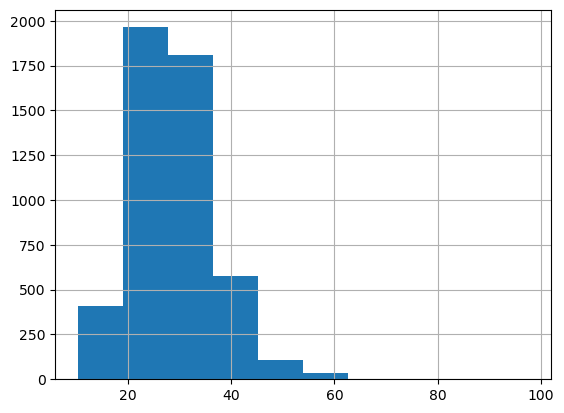

In [61]:
df["bmi"].hist()

<Axes: ylabel='bmi'>

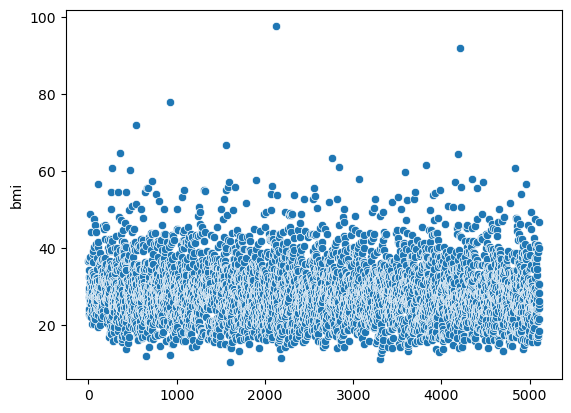

In [62]:
sns.scatterplot(df["bmi"])

In [63]:
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

In [64]:
df.isnull().sum()

age                      0
hypertension             0
heart_disease            0
ever_married             0
Residence_type           0
avg_glucose_level        0
bmi                      0
stroke                   0
Female                   0
Male                     0
Other                    0
Govt_job                 0
Never_worked             0
Private                  0
Self-employed            0
children                 0
smoke_Unknown            0
smoke_formerly smoked    0
smoke_never smoked       0
smoke_smokes             0
dtype: int64

In [65]:
X, y = df.drop(columns=["stroke"]), df["stroke"]

In [66]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
classifier = LogisticRegression().fit(train_X, train_y)

e:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
pred_y = classifier.predict(test_X)

In [69]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



e:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
